# GLM via SKLearn

Please email: Joshua_Zimmer@hms.harvard.edu with questions

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('./backend')

import sglm
import sglm_cv
import sglm_test

/Users/josh/opt/anaconda3/lib/python3.8/site-packages/pyglmnet/pyglmnet.py:863: UserWarning: Reached max number of iterations without convergence.
  warnings.warn(


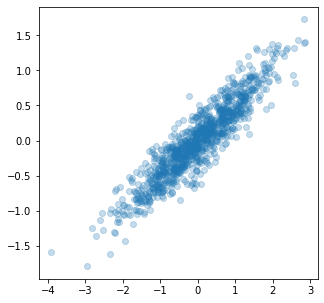

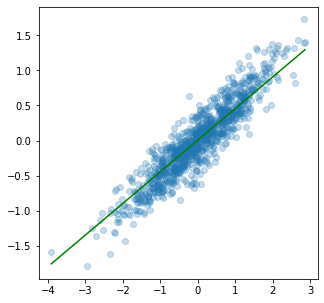

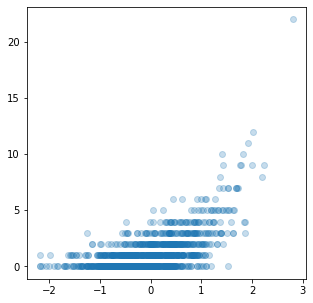

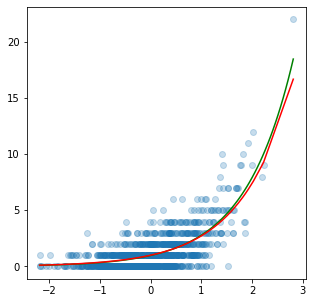

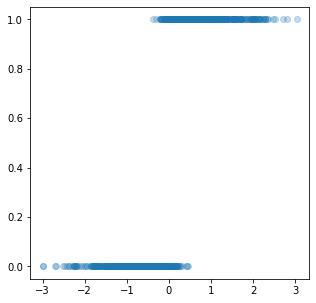

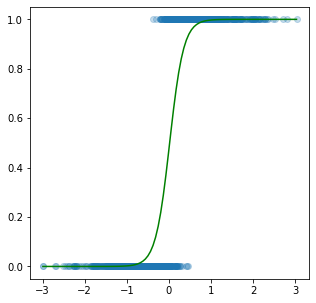

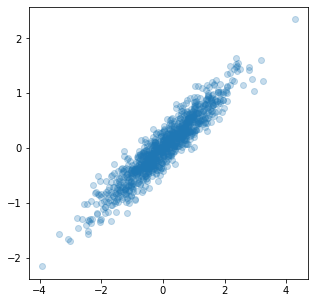

In [3]:
sglm_test.test_normal_ols()
sglm_test.test_poisson_glm()
sglm_test.test_logistic_glm()
sglm_test.test_normal_ols_cv()

In [4]:
import sglm_pp

In [14]:
import numpy as np

X_to_shift = np.ones((10,10))
shift_amt = 3

append_vals = np.zeros((np.abs(shift_amt), X_to_shift.shape[1])) * np.nan

shifted_X = np.concatenate((append_vals, X_to_shift), axis=0)
shifted_X = shifted_X[:-shift_amt, :]
shifted_X


array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]])

In [15]:
shifted_X = np.concatenate((X_to_shift, append_vals), axis=0)
shifted_X = shifted_X[shift_amt:, :]

shifted_X

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]])

In [ ]:
# Gaussian

In [7]:
from scipy import stats
import matplotlib.pyplot as plt
import sys
sys.path.append('./backend')
import sglm
import numpy as np

norm = stats.norm()

true_x = norm.rvs(size=1000)
true_y = true_x * 0.5
obs_y = (true_y + norm.rvs(size=1000)*0.2)

x = true_x[:,None]
y = obs_y

plt.figure(figsize=(5,5))
plt.scatter(x, y, alpha = 0.25)

glm = sglm.GLM('Normal', alpha=0)
glm.fit(x, y)
coef, intercept = glm.coef_, glm.intercept_

view_x = np.linspace(x.min(), x.max(), num=100)
view_y = view_x*coef + intercept
obs_y = (true_y + norm.rvs(size=1000)*0.)

plt.figure(figsize=(5,5))
plt.scatter(x[:,0], y, alpha = 0.25)
plt.plot(view_x, np.squeeze(view_y), color='g')

SKL: Intercept — 0.5047619047619049, Coefs — [0.5]
GLM: Intercept — 0.5047646616236333, Coefs — [0.5]


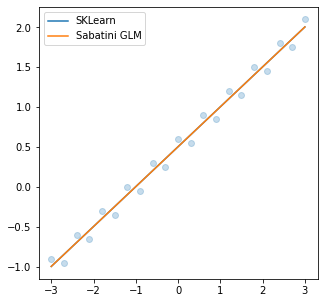

In [59]:
epsilon = 0.01

true_x = np.linspace(-3, 3, 21)
true_y = true_x * 0.5 + 0.5
obs_y = (true_y + (-1)**np.arange(len(true_x)) * 0.1)

x = true_x[:,None]
y = obs_y

plt.figure(figsize=(5,5))
plt.scatter(x, y, alpha = 0.25)

from sklearn.linear_model import LinearRegression
sklr = LinearRegression()
sklr.fit(x, y)

plt.plot(true_x, sklr.predict(x), label='SKLearn')

glm = sglm.GLM('Normal', alpha=0, reg_lambda=0)
glm.fit(x, y)
coef, intercept = glm.coef_, glm.intercept_

plt.plot(true_x, glm.model.predict(x), label='Sabatini GLM')
plt.legend()

print(f"SKL: Intercept — {sklr.intercept_}, Coefs — {sklr.coef_}")
print(f"GLM: Intercept — {glm.intercept_}, Coefs — {glm.coef_}")

assert(np.abs(sklr.intercept_ - glm.intercept_) < epsilon)
assert(np.all(np.abs(sklr.coef_ - glm.coef_) < epsilon))

In [60]:
# Poisson

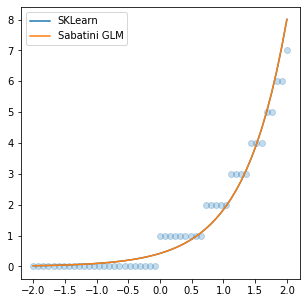

In [61]:
epsilon = 0.01

true_x = np.linspace(-2, 2, 51)
true_y = np.exp(true_x)
obs_y = np.array([np.floor(np.exp(_)) for _ in true_x]).reshape(-1)

x = true_x[:,None]
y = obs_y

plt.figure(figsize=(5,5))
plt.scatter(x, y, alpha = 0.25)

from sklearn.linear_model import PoissonRegressor
sklr = PoissonRegressor(alpha=0)
sklr.fit(x, y)

plt.plot(true_x, sklr.predict(x), label='SKLearn')

glm = sglm.GLM('Poisson', reg_lambda=0)
glm.fit(x, y)
coef, intercept = glm.coef_, glm.intercept_

plt.plot(true_x, glm.model.predict(x), label='Sabatini GLM')
plt.legend()

view_x = np.linspace(x.min(), x.max(), num=100)
view_y = np.exp(view_x*coef + intercept)

assert(np.abs(sklr.intercept_ - glm.intercept_) < epsilon)
assert(np.all(np.abs(sklr.coef_ - glm.coef_) < epsilon))

[0.42423622] 0.42439225457437973 [[1.21206667]] [1.21210732]


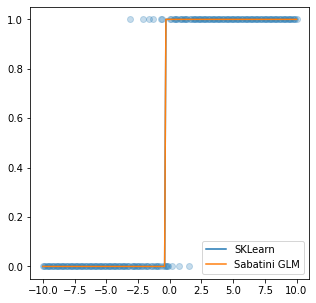

In [148]:
epsilon = 0.01

z = np.linspace(-10, 10, 201)
sigmoid_z = 1/(1+np.exp(-z))
sample = np.random.binomial(1,sigmoid_z)

true_x = z #np.linspace(-10, 10, 101)
true_y = sigmoid_z #(true_x > 0)*1.0
obs_y = sample

x = true_x[:,None]
y = obs_y

plt.figure(figsize=(5,5))
plt.scatter(x, y, alpha = 0.25)

from sklearn.linear_model import LogisticRegression
sklr = LogisticRegression(C=np.inf)
sklr.fit(x, y)

plt.plot(true_x, sklr.predict(x), label='SKLearn')

glm = sglm.GLM('Logistic', reg_lambda=0.0, alpha=0, max_iter=10000)
glm.fit(x, y)
coef, intercept = glm.coef_, glm.intercept_

plt.plot(true_x, glm.model.predict(x), label='Sabatini GLM')
plt.legend()

print(sklr.intercept_, glm.intercept_, sklr.coef_, glm.coef_)

assert(np.abs(sklr.intercept_ - glm.intercept_) < epsilon)
assert(np.all(np.abs(sklr.coef_ - glm.coef_) < epsilon))